# Crack Detection using Drone Images

This notebook processes images to detect cracks using various image processing techniques.

In [2]:
import cv2
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern
from skimage.morphology import opening, closing, disk
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Load image
image_path = 'c.jpg'  # Adjust the image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not found or path is incorrect.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


In [4]:
# Noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

In [5]:
# Adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(blurred_image)

In [6]:
# Morphological processing
selem = disk(6)
opened_image = opening(enhanced_image, selem)
closed_image = closing(opened_image, selem)

In [7]:
# GLCM
glcm = graycomatrix(closed_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
contrast = graycoprops(glcm, 'contrast')[0, 0]
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]
ASM = graycoprops(glcm, 'ASM')[0, 0]

print(f'GLCM - Contrast: {contrast}, Dissimilarity: {dissimilarity}, Homogeneity: {homogeneity}, Energy: {energy}, Correlation: {correlation}, ASM: {ASM}')

GLCM - Contrast: 15.737267514595496, Dissimilarity: 1.7906077981651376, Homogeneity: 0.6257499872345387, Energy: 0.038460661862887977, Correlation: 0.997632134675888, ASM: 0.0014792225109314058


In [8]:
# LBP
radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(closed_image, n_points, radius, method='uniform')
n_bins = int(lbp.max() + 1)
lbp_hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)

In [9]:
# Edge detection
edges = cv2.Canny(closed_image, 100, 200)

In [10]:
# Feature vector
features = np.hstack([contrast, dissimilarity, homogeneity, energy, correlation, ASM, lbp_hist])

In [11]:
# Generate synthetic data for demonstration
num_samples = 100
X = np.array([features for _ in range(num_samples)])
y = np.random.randint(2, size=num_samples)  # Synthetic labels (0 for no crack, 1 for crack)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict and evaluate SVM
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0))
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')

# Check if crack is detected
crack_detected_svm = "Crack detected" if 1 in y_pred_svm else "No crack detected"
print(f'SVM Prediction: {crack_detected_svm}')

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      1.00      0.71        11

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20

Accuracy: 0.55
SVM Prediction: Crack detected


In [13]:
# Train MLP classifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)

# Predict and evaluate MLP
y_pred_mlp = mlp.predict(X_test)
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp, zero_division=0))
print(f'Accuracy: {accuracy_score(y_test, y_pred_mlp)}')

# Check if crack is detected
crack_detected_mlp = "Crack detected" if 1 in y_pred_mlp else "No crack detected"
print(f'MLP Prediction: {crack_detected_mlp}')

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      1.00      0.71        11

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20

Accuracy: 0.55
MLP Prediction: Crack detected


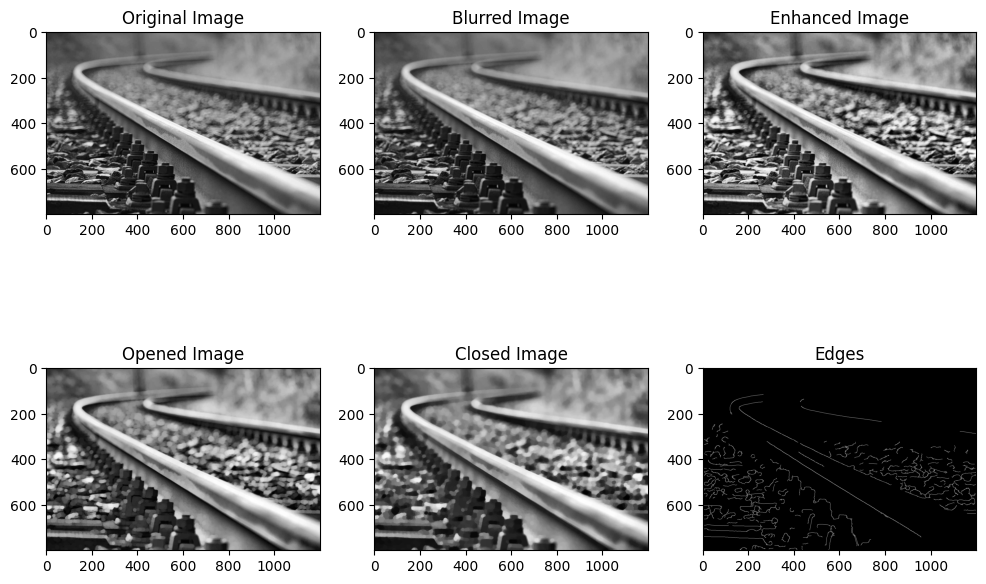

In [14]:
# Display images
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(blurred_image, cmap='gray'), plt.title('Blurred Image')
plt.subplot(2, 3, 3), plt.imshow(enhanced_image, cmap='gray'), plt.title('Enhanced Image')
plt.subplot(2, 3, 4), plt.imshow(opened_image, cmap='gray'), plt.title('Opened Image')
plt.subplot(2, 3, 5), plt.imshow(closed_image, cmap='gray'), plt.title('Closed Image')
plt.subplot(2, 3, 6), plt.imshow(edges, cmap='gray'), plt.title('Edges')
plt.show()